#Story Telling TTS evaluation

**Please sign in and make a copy of this notebook by clicking on "File" on top and selecting "save a copy in Drive"**

*This evaluation will take around 15-20 minutes to complete. Thank you for signing up!*

Here are the instructions:
1. Please run the first section "Setting up the system" by clicking on the play button below the heading as shown. This will require your permission to access Google sheets. Please do accordingly. 

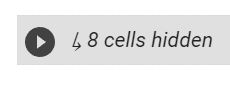
2. Once this is done, please toggle the "Evaluation" section and run the cell. Now you can get started with the evaluation.
3. Finally please run the last cell to uploadd the results.

# Setting up the system

In [ ]:
!gdown "1r7eaAdPuNisTYHdhLxOMFtZsM0GNc1Zx&confirm=t" 
!unzip final_outputs.zip 
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
import time

creds, _ = default()

gc = gspread.authorize(creds)

from pathlib import Path
from ipywidgets import Output, Button, Layout, HBox, VBox
from IPython.display import Audio, display, clear_output
import os
import random

Downloading...
From: https://drive.google.com/uc?id=1r7eaAdPuNisTYHdhLxOMFtZsM0GNc1Zx&confirm=t
To: /content/final_outputs.zip
100% 57.7M/57.7M [00:01<00:00, 41.1MB/s]
Archive:  final_outputs.zip
   creating: final_outputs/27_vits/
  inflating: final_outputs/27_vits/sample1.wav  
  inflating: final_outputs/27_vits/sample10.wav  
  inflating: final_outputs/27_vits/sample11.wav  
  inflating: final_outputs/27_vits/sample12.wav  
  inflating: final_outputs/27_vits/sample13.wav  
  inflating: final_outputs/27_vits/sample14.wav  
  inflating: final_outputs/27_vits/sample15.wav  
  inflating: final_outputs/27_vits/sample16.wav  
  inflating: final_outputs/27_vits/sample17.wav  
  inflating: final_outputs/27_vits/sample18.wav  
  inflating: final_outputs/27_vits/sample19.wav  
  inflating: final_outputs/27_vits/sample2.wav  
  inflating: final_outputs/27_vits/sample20.wav  
  inflating: final_outputs/27_vits/sample3.wav  
  inflating: final_outputs/27_vits/sample4.wav  
  inflating: final_out

In [ ]:
reference_path = "ground_truth"
vits_27 = "27_vits"
text_encoder = "text_encoder"
vits_ljspeech = "vits_ljspeech"
vits_nc = "vits_nc"
common_path = "/content/final_outputs/"
#reference = [common_path+reference_path+"/sample"+str(i)+".wav" for i in range(1,12)]
test = [vits_27,text_encoder,vits_ljspeech, vits_nc,reference_path]
audio_pairs = []
pairs = []
for i in range(1,12):
  a = random.sample(test,1)
  audio_pairs.append([common_path+j+'/sample'+str(i)+'.wav' for j in a])
  pairs.append(a)
classes = [1,2,3,4,5]

text = ["'If I have enough breath left with which to reach that little house, I may be saved,' he said to himself.",
        "Not waiting another moment, he darted swiftly through the woods, the Assassins still after him.",
        "After a hard race of almost an hour, tired and out of breath, Pinocchio finally reached the door of the cottage and knocked.",
        "No one answered. He knocked again, harder than before, for behind him he heard the steps and the labored breathing of his persecutors.",
        "At the noise, a window opened, and a lovely maiden looked out. She had azure hair and a face white as wax.",
        "With a voice so weak that it hardly could be heard, she whispered: 'No one lives in this house. Everyone is dead.'",
        "'Won't you, at least, open the door for me?' cried Pinocchio in a beseeching voice.",
        "'I also am dead.' 'Dead? What are you doing at the window, then?' 'I am waiting for the coffin to take me away.'",
        "'Oh, Lovely Maiden with Azure Hair,' cried Pinocchio, 'open, I beg of you. Take pity on a poor boy who is being chased by two Assass--'",
        "He did not finish, for two powerful hands grasped him by the neck and the same two horrible voices growled threateningly: 'Now we have you!'",
        "The Marionette, seeing death dancing before him, trembled so hard that the joints of his legs rattled and the coins tinkled under his tongue."]

pre_text = ["As he ran, the Marionette felt more and more certain that he would have to give himself up into the hands of his pursuers. Suddenly he saw a little cottage gleaming white as the snow among the trees of the forest.",
            "'If I have enough breath left with which to reach that little house, I may be saved,' he said to himself.",
            "Not waiting another moment, he darted swiftly through the woods, the Assassins still after him.",
            "After a hard race of almost an hour, tired and out of breath, Pinocchio finally reached the door of the cottage and knocked.",
            "The same silence followed. As knocking was of no use, Pinocchio, in despair, began to kick and bang against the door, as if he wanted to break it.",
            "At the noise, a window opened, and a lovely maiden looked out. She had azure hair and a face white as wax.",
            "With a voice so weak that it hardly could be heard, she whispered: 'No one lives in this house. Everyone is dead.'",
            "'Won't you, at least, open the door for me?' cried Pinocchio in a beseeching voice.",
            "After these words, the little girl disappeared and the window closed without a sound.",
            "'Oh, Lovely Maiden with Azure Hair,' cried Pinocchio, 'open, I beg of you. Take pity on a poor boy who is being chased by two Assass--'",
            "He did not finish, for two powerful hands grasped him by the neck and the same two horrible voices growled threateningly: 'Now we have you!'"
            ]
post_text = ["Not waiting another moment, he darted swiftly through the woods, the Assassins still after him.",
             "After a hard race of almost an hour, tired and out of breath, Pinocchio finally reached the door of the cottage and knocked.",
            "No one answered. He knocked again, harder than before, for behind him he heard the steps and the labored breathing of his persecutors.",
               "The same silence followed. As knocking was of no use, Pinocchio, in despair, began to kick and bang against the door, as if he wanted to break it.",
              "Her eyes were closed, and her hands crossed on her breast.",
             "'Won't you, at least, open the door for me?' cried Pinocchio in a beseeching voice.",
             "'I also am dead.' 'Dead? What are you doing at the window, then?' 'I am waiting for the coffin to take me away.'",
             "After these words, the little girl disappeared and the window closed without a sound.",
             "He did not finish, for two powerful hands grasped him by the neck and the same two horrible voices growled threateningly: 'Now we have you!'",
             "The Marionette, seeing death dancing before him, trembled so hard that the joints of his legs rattled and the coins tinkled under his tongue.",
             "",]

In [ ]:
# set up empty dict for labels and initial position
labels = {}
position = 0
pre = pre_text[position]
ref_text = text[position]
post = post_text[position]
#ref_aud = Audio(reference[position])
audio1 = Audio(audio_pairs[position][0])
#audio2 = Audio(audio_pairs[position][1])

frame1 = Output()
frame2 = Output()
frame3 = Output()

with frame1:
  print("sample " + str(position) +  ": How was the expression in the audio with respect to the sentence?")
  display(audio1)
'''
with frame2:
  print(str(position) +  " : Sample " + "B")
  display(audio2)
'''
with frame3:
  print(pre + " \033[95m" + ref_text + " \033[0m"+ post)
  print('\n')
  print("-------------------------------------------------------------------------------------------\n")
  #print(str(position)+" : reference audio")
  #display(ref_aud)
  #print("\n")


In [ ]:
def next_pair(*args) -> None:

    """Select the next audio and update the displays."""
    global position, audio1, audio2

    # update position
    position += 1
    if position == len(audio_pairs):
        clear_output(wait=True)
        print("Thank you! Please run the cell below!")
        return
    # refresh display
    #audio1 = Audio(audio_pairs[position][0])
    #audio2 = Audio(audio_pairs[position][1])
    ref_text = text[position]
    pre = pre_text[position]
    post = post_text[position]
    #ref_aud = Audio(reference[position])
    with frame1:
      clear_output(wait=True)
      print("sample " + str(position) +  ": How was the expression in the audio with respect to the sentence?")
      #display(audio1)
      display(Audio(audio_pairs[position][0]))
    '''
    with frame2:
      clear_output(wait=True)
      print(str(position) +  " : Sample " + "B")
      #display(audio2)
      display(Audio(audio_pairs[position][1]))
    '''
    with frame3:
      clear_output(wait=True)
      print(pre + " \033[95m" + ref_text + " \033[0m"+ post)
      print('\n')
      print("-------------------------------------------------------------------------------------------\n")
      #print(str(position)+" : reference audio")
      #display(ref_aud)
      #display(Audio(reference[position]))
      #print("\n")

In [ ]:
def prev_pair(*args) -> None:
    """Select the previous audio and update the displays."""
    global position, audio1, audio2

    # update position
    position += 1
    if position == -1:
        position=0

    # refresh display
    #audio1 = Audio(audio_pairs[position][0])
    #audio2 = Audio(audio_pairs[position][1])
    ref_text = text[position]
    pre = pre_text[position]
    post = post_text[position]
    #ref_aud = Audio(reference[position])
    with frame1:
      clear_output(wait=True)
      print(str(position) +  " : Sample " + "A")
      #display(audio1)
      display(Audio(audio_pairs[position][0]))
      '''
    with frame2:
      clear_output(wait=True)
      print(str(position) +  " : Sample " + "B")
      #display(audio2)
      display(Audio(audio_pairs[position][1]))
      '''
    with frame3:
      clear_output(wait=True)
      print(pre + " \033[95m" + ref_text + " \033[0m"+ post)
      print('\n')
      print("-------------------------------------------------------------------------------------------\n")
      #print(str(position)+" : reference audio")
      #display(ref_aud)
      #display(Audio(reference[position]))
      #print("\n")

In [ ]:
forward_button = Button(description="next >")
forward_button.on_click(next_pair)
backward_button = Button(description="previous <")
backward_button.on_click(prev_pair)

navigation_buttons = [backward_button, forward_button]

In [ ]:
def store_label(button: Button) -> None:
    """Annotates the current audio with the button's description."""
    global labels

    # store the assigned label
    if button.description == "Bad : 1":
      labels[position] = 1
    elif button.description == "Excellent : 5":
      labels[position] = 5
    else:
      labels[position] = int(button.description)

    clear_output(wait=True)

    # move to next image
    #next_pair()

In [ ]:
class_buttons = []
for label in classes:
  if label==1:
    label_button = Button(description="Bad : " + str(label))
  elif label==5:
    label_button = Button(description="Excellent : " + str(label))
  else:
    label_button = Button(description=str(label))
  label_button.on_click(store_label)
  class_buttons.append(label_button)

#Evaluation
1. In the 11 items of this perceptual test, you will hear a female English speaker **narrating a story to a child from a book.**
2. You can see the text corresponding to the spoken sentence highlighted in purple color. 
3. Please listen to each of the two samples of the audio namely sample A and sample B.
4. Then select the sample that you feel is **most appropriate for the context.** Please pay attention to the speaker's **expressiveness** and ignore any other aspects such as audio recording quality or speaker's natural voice.
5. Click next to go to the next example.

In [ ]:
print("-------------------------------------------------------------------------------------------\n")

display(VBox([frame3,frame1]))
display(HBox(class_buttons))
display(HBox(navigation_buttons))

Thank you! Please run the cell below!


# Upload results

In [ ]:
age = input("Please enter your age")
english_prof = input("Please enter one of the levels for you english proficiency: \n write 'L' if a)Limited working proficieny \n 'F' if b)Fully Professional \n 'N' if c)Native")
wks = gc.open_by_url("")
worksheet = wks.add_worksheet(title="user_"+str(age)+str(english_prof)+"_"+str(time.time()), rows="100", cols="20")
final_result = [pairs[i].extend(labels[list(labels.keys())[i]]) for i in range(0,11)]
worksheet.update('A1', pairs)

Please enter your age20
Please enter one of the levels for you english proficiency: 
 write 'L' if a)Limited working proficieny 
 'F' if b)Fully Professional 
 'N' if c)NativeF


In [ ]:
print(labels)

{0: 1, 1: 3, 2: 3, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 1, 9: 3, 10: 4}
